In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


In [299]:
df = pd.read_csv(r'G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\credit.csv')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [300]:
df.isna().sum()
df.duplicated().sum()

0

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [302]:
corr = df.corr()
corr.style.background_gradient(cmap="YlOrRd")

,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


check for multicolinearity`

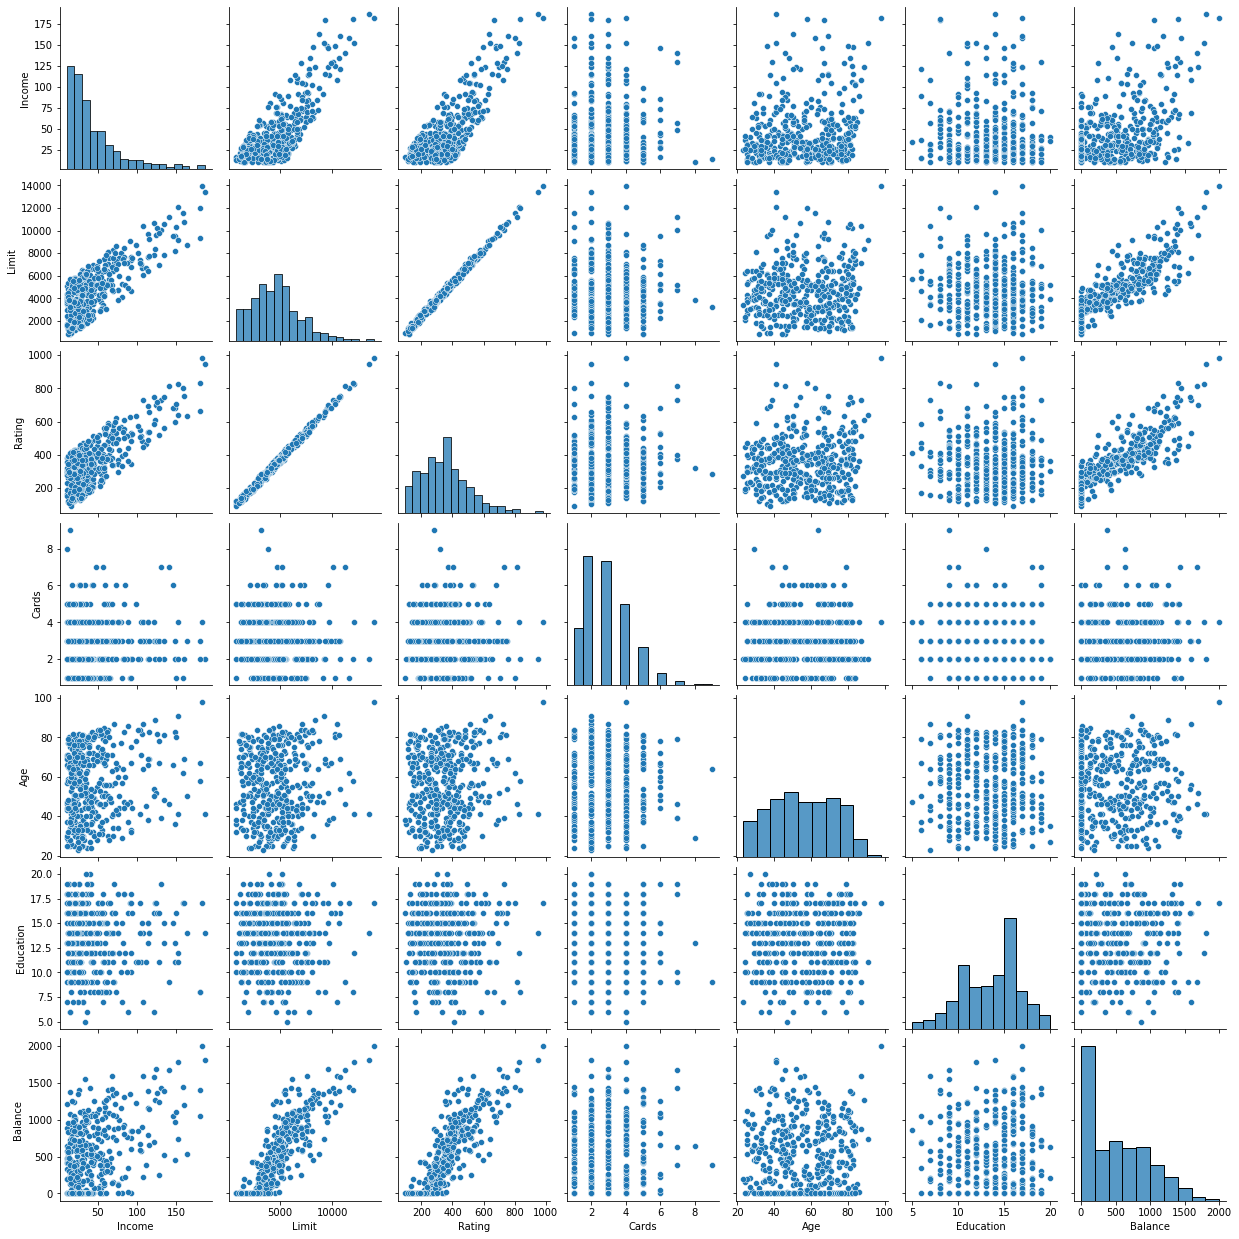

In [303]:
sns.pairplot(df)
plt.show()

In [304]:
num = []
for col in df.columns[:-1]:
    if pd.api.types.is_numeric_dtype(df[col]) and col not in ["Limit"]:
        num.append(col)
    if pd.api.types.is_object_dtype(df[col]):
        df[col] = df[col].astype('category')

In [305]:
X = X_design = df.drop(columns=["Balance","Limit"])
y = X_design = df.Balance
print(X)

      Income  Rating  Cards  Age  Education  Own Student Married Region
0     14.891     283      2   34         11   No      No     Yes  South
1    106.025     483      3   82         15  Yes     Yes     Yes   West
2    104.593     514      4   71         11   No      No      No   West
3    148.924     681      3   36         11  Yes      No      No   West
4     55.882     357      2   68         16   No      No     Yes  South
..       ...     ...    ...  ...        ...  ...     ...     ...    ...
395   12.096     307      3   32         13   No      No     Yes  South
396   13.364     296      5   65         17   No      No      No   East
397   57.872     321      5   67         12  Yes      No     Yes  South
398   37.728     192      1   44         13   No      No     Yes  South
399   18.701     415      5   64          7  Yes      No      No   West

[400 rows x 9 columns]


In [306]:
for col in X.columns:
    if pd.api.types.is_categorical_dtype(X[col]):
        enc = OneHotEncoder(drop='first', dtype=int)
        array = enc.fit_transform(X[[col]].values).toarray()
        name = [f'{col}_{name}' for name in enc.categories_[0][1:]]
        X[name] = array
        X.drop(columns=col, inplace=True)

n = 2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=n)

## Linear Regression without categorical variables

In [307]:
lreg = LinearRegression()
lreg.fit(X_train[num],y_train)
y_pred = lreg.predict(X_test[num])
R2_train = lreg.score(X_train[num],y_train)
R2_test = lreg.score(X_test[num],y_test)
MSE_1 = mean_squared_error(y_test,y_pred)
print(f'R2 Train Score: {R2_train}')
print(f'R2 Test Score: {R2_test}')
print(f'MSE : {MSE_1}')

R2 Train Score: 0.8745843525856317
R2 Test Score: 0.883061087011205
MSE : 23045.68202857417


## Linear Regression with encoded variables

In [308]:
lreg2 = LinearRegression()
lreg2.fit(X_train, y_train)
y_pred2 = lreg2.predict(X_test)
R2e_train = lreg2.score(X_train, y_train)
R2e_test = lreg2.score(X_test, y_test)
MSE_2 = mean_squared_error(y_test,y_pred2)
print(f'R2 Train Score: {R2e_train}')
print(f'R2 Test Score: {R2e_test}')
print(f'MSE : {MSE_2}')

R2 Train Score: 0.951642818879776
R2 Test Score: 0.9463644040935155
MSE : 10570.210181382256


In [309]:
coeffs = pd.DataFrame(data=lreg2.coef_, columns=["Beta value"], index=X.columns)
coeffs

,Beta value
Income,-7.778763
Rating,3.988850
Cards,4.460190
Age,-0.705630
Education,-0.566939
Own_Yes,-11.610515
Student_Yes,401.649244
Married_Yes,-26.753332
Region_South,17.398505
Region_West,41.477269


In [310]:
idx = np.argsort(coeffs["Beta value"])
coeffs["Beta value"] = coeffs["Beta value"].values[idx]
coeffs.index = coeffs.index[idx]
coeffs


,Beta value
Married_Yes,-26.753332
Own_Yes,-11.610515
Income,-7.778763
Age,-0.705630
Education,-0.566939
Rating,3.988850
Cards,4.460190
Region_South,17.398505
Region_West,41.477269
Student_Yes,401.649244


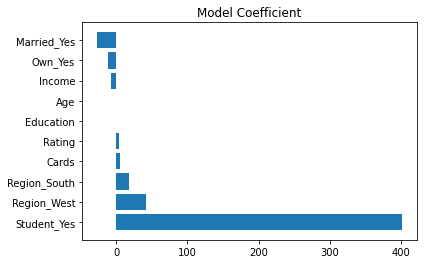

In [311]:
plt.barh(coeffs.index[::-1],coeffs["Beta value"][::-1])
plt.title(label='Model Coefficient')
plt.show()

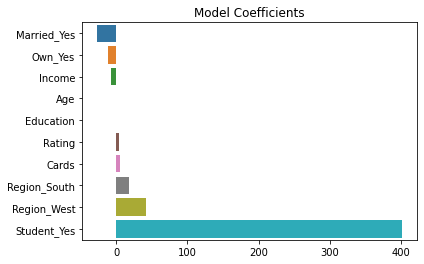

In [312]:
# Visualize crude measure of feature importance.
sns.barplot(data=coeffs.T, orient='h').set(title='Model Coefficients');